In [18]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [19]:
# Directories for training and testing data
train_data_dir = 'C:/Users/lasit/Desktop/Campus/4th year/1sem/DL/dl_assignment/gemstones-images/train'
test_data_dir = 'C:/Users/lasit/Desktop/Campus/4th year/1sem/DL/dl_assignment/gemstones-images/test'


In [20]:
# Define constants
batch_size = 32
image_size = (299, 299)  # Change to 299x299 for InceptionV3
epochs = 100

In [21]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
# No augmentation for the test set, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  
)

Found 2856 images belonging to 87 classes.


In [23]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 363 images belonging to 87 classes.


In [24]:
# Load the pre-trained InceptionV3 model with ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model
base_model.trainable = False

In [25]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout to reduce overfitting
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [26]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,990,135 (91.52 MB)

 Trainable params: 2,187,351 (8.34 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [28]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100


c:\Users\lasit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.0293 - loss: 4.5353 - val_accuracy: 0.1250 - val_loss: 4.0123 - learning_rate: 1.0000e-04
Epoch 2/100
 1/89 ━━━━━━━━━━━━━━━━━━━━ 1:48 1s/step - accuracy: 0.0000e+00 - loss: 4.2476

c:\Users\lasit\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: 4.2476 - val_accuracy: 0.0909 - val_loss: 4.2062 - learning_rate: 1.0000e-04
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.1484 - loss: 3.8743 - val_accuracy: 0.2869 - val_loss: 3.5065 - learning_rate: 1.0000e-04
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1562 - loss: 3.5402 - val_accuracy: 0.0000e+00 - val_loss: 3.9869 - learning_rate: 1.0000e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2273 - loss: 3.4039 - val_accuracy: 0.3381 - val_loss: 3.0735 - learning_rate: 1.0000e-04
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2812 - loss: 3.1733 - val_accuracy: 0.0909 - val_loss: 3.7659 - learning_rate: 1.0000e-04
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3097 - loss: 2.9634 - val_accuracy: 0.4062 - val_loss: 2.7562 - learning_rate: 1.0000e-04
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2500 -

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5852 - loss: 1.5490
Test Accuracy: 60.51%


In [30]:
# Unfreeze the base model layers for fine-tuning
base_model.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=10,  # Fine-tune for fewer epochs
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 544s 6s/step - accuracy: 0.3909 - loss: 2.3207 - val_accuracy: 0.5455 - val_loss: 1.5279 - learning_rate: 1.0000e-05
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5625 - loss: 1.6034 - val_accuracy: 0.4545 - val_loss: 2.3889 - learning_rate: 1.0000e-05
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.5860 - loss: 1.4631 - val_accuracy: 0.5909 - val_loss: 1.4486 - learning_rate: 1.0000e-05
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7812 - loss: 1.0304 - val_accuracy: 0.3636 - val_loss: 2.1535 - learning_rate: 1.0000e-05
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 494s 6s/step - accuracy: 0.6411 - loss: 1.2461 - val_accuracy: 0.5938 - val_loss: 1.3488 - learning_rate: 1.0000e-05
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8438 - loss: 0.6276 - val_accuracy: 0.4545 - val_loss: 1.9328 - learning_rate: 1.0000e-05
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 481s 5s/step - accuracy: 0.6978 - l

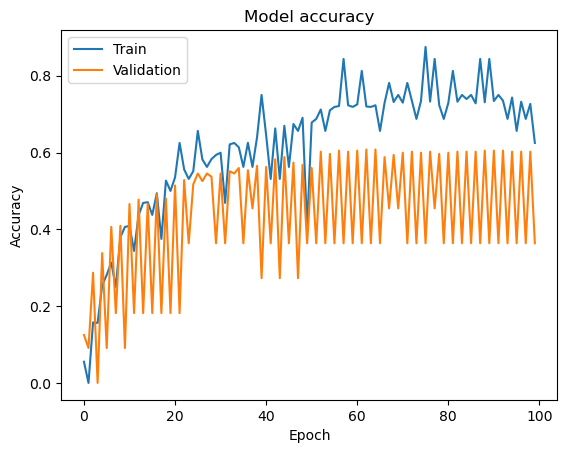

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

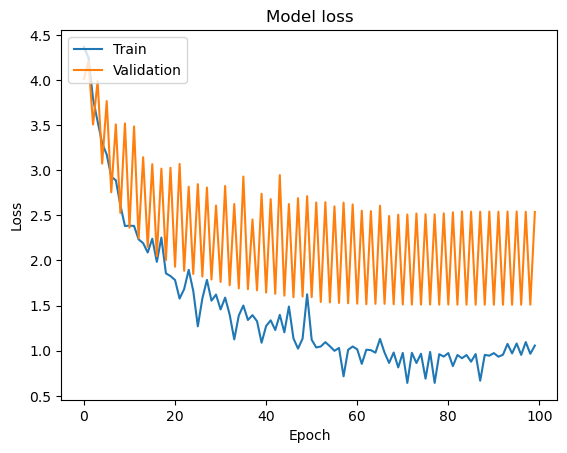

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [40]:

# Path to your image
img_path = r'C:\Users\lasit\Desktop\Campus\4th year\1sem\DL\dl_assignment\aventurine green_3.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(299, 299))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  

In [41]:
# Make a prediction
predictions = model.predict(img_array)

# Get predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get corresponding class label from the training generator
class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class: Jade


In [39]:
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions without using 'steps' parameter
predictions = model.predict(test_generator)

# Get the predicted class labels
y_pred = np.argmax(predictions, axis=1)

# True labels
y_true = test_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step
                   precision    recall  f1-score   support

      Alexandrite       0.60      0.75      0.67         4
        Almandine       0.33      0.25      0.29         4
        Amazonite       0.67      0.50      0.57         4
            Amber       1.00      1.00      1.00         4
         Amethyst       0.17      0.25      0.20         4
         Ametrine       0.50      0.50      0.50         4
       Andalusite       0.33      0.25      0.29         4
        Andradite       0.33      0.50      0.40         4
       Aquamarine       0.00      0.00      0.00         5
 Aventurine Green       0.60      0.60      0.60         5
Aventurine Yellow       1.00      1.00      1.00         4
        Benitoite       0.67      0.50      0.57         4
     Beryl Golden       0.25      0.25      0.25         4
          Bixbite       0.29      0.50      0.36         4
       Bloodstone       1.00      0.75      0.86         4
  Blue Lace Agat

c:\Users\lasit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lasit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lasit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
